<a href="https://colab.research.google.com/github/helookscool/Projects/blob/main/LSTM%EC%9C%BC%EB%A1%9C_%EA%B5%AC%ED%98%84%ED%95%9C_Fama_French_Three_Factor_Model%EC%97%85%EA%B7%B8%EB%A0%88%EC%9D%B4%EB%93%9C%EB%B2%84%EC%A0%841%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 자료출처
fama french 3 factor in korea daily return (only kospi).csv : 한다 파트너스(Handa Partners) 리서치 서비스[(https://gitlab.com/pr_handa/research)

Fama/French 3 Research Factors : http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html#Research

시장금리 추이.xls, 국고채10년(평균) : e-나라지표 국정모니터링 지표[http://www.krx.co.kr/main/main.jsp]

인덱스펀드 수익 : 미래에셋코스피200인덱스증권투자신탁1호(주식-파생형)[https://investments.miraeasset.com/fund/view.do?fundGb=2&fundCd=461201]

KBSTAR 200.csv : KRX정보데이터 시스템 개별종목 시세 추이 종목명 148020/KBSTAR 200 [http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201030101#]

Fidelity Contrafund Fund (FCNTX): https://finance.yahoo.com/quote/FCNTX/history?period1=347241600&period2=1630368000&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true

#KOSPI버전

# 전처리 및 베이스라인 만들기
-베이스라인=선형회귀

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir('/content/drive/MyDrive/projects/프로젝트3/파마프렌치/')

In [5]:
#SMB, HML요소 추출
df = pd.read_csv('fama french 3 factor in korea daily return (only kospi)-수정.csv')
df

,Unnamed: 0,Mkt-Rf,SMB,HML
0,2011-10-20,-0.027527,0.005013,0.009700
1,2011-10-21,0.018274,0.000347,-0.004640
2,2011-10-24,0.032473,-0.012612,-0.000695
3,2011-10-25,-0.005227,0.001447,0.011156
4,2011-10-26,0.002874,0.002790,0.003696
...,...,...,...,...
2053,2020-02-24,-0.038749,0.001202,0.004622
2054,2020-02-25,0.011751,0.006517,-0.017119
2055,2020-02-26,-0.012849,0.003835,0.003144
2056,2020-02-27,-0.010549,-0.011719,0.004064


In [6]:
#무위험이자율로 사용할 10년장기 국공채이자율 추출
df_rf = pd.read_excel('무위험이자율.xls').T
df_rf.head()

,0,1,2,3,4,5,6,7,8,9,10
통계표명:,단위:,NaN,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리,출처:,주석:
시장금리 추이,"기간중 평균금리, %",201010월,3.24,3.66,4.11,4.13,2.66,2.26,2.25,한국은행 경제통계시스템 &gt; 4. 금리,"* 콜금리 목표는 월말 기준이며,국고채10년은 00.11월부터, 콜금리목표는 99...."
Unnamed: 2,NaN,201011월,3.40,4.03,4.48,4.19,2.73,2.37,2.50,NaN,NaN
Unnamed: 3,NaN,201012월,3.25,4.02,4.46,4.17,2.80,2.50,2.50,NaN,NaN
Unnamed: 4,NaN,201101월,3.71,4.30,4.69,4.52,2.93,2.66,2.75,NaN,NaN


In [7]:
#시장포트폴리오수익률 추출
df_M = pd.read_csv('KBSTAR 200 수정.csv', encoding='cp949')
df_M.head()

,일자,종가,대비,등락률,순자산가치(NAV),시가,고가,저가,거래량,거래대금,시가총액,순자산총액,상장좌수,기초지수_지수명,기초지수_종가,기초지수_대비,기초지수_등락률,국고채10년(평균)
0,2011-10-20,23495,710,-2.93,23552.62,24150,24400,23495,517112,1.225670e+10,1.060000e+11,1.060000e+11,4500000,코스피 200,235.57,NaN,NaN,0.0411
1,2011-10-21,23850,355,1.51,23997.35,23695,23965,23515,56310,1.329819e+09,1.070000e+11,1.080000e+11,4500000,코스피 200,240.02,4.45,1.89,0.0411
2,2011-10-24,24765,915,3.84,24817.08,24205,24765,24180,979,2.401842e+07,1.110000e+11,1.120000e+11,4500000,코스피 200,248.21,8.19,3.41,0.0411
3,2011-10-25,24605,160,-0.65,24715.20,24805,24805,24565,15047,3.716495e+08,1.110000e+11,1.110000e+11,4500000,코스피 200,247.20,1.01,-0.41,0.0411
4,2011-10-26,24655,50,0.20,24751.15,24400,24655,24325,55120,1.351032e+09,1.110000e+11,1.110000e+11,4500000,코스피 200,247.56,0.36,0.15,0.0411


In [8]:
#df_M.index = df_M.index.strftime('%y-%m')

In [9]:
df_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   일자          2058 non-null   object 
 1   종가          2058 non-null   int64  
 2   대비          2058 non-null   int64  
 3   등락률         2058 non-null   float64
 4   순자산가치(NAV)  2058 non-null   float64
 5   시가          2058 non-null   int64  
 6   고가          2058 non-null   int64  
 7   저가          2058 non-null   int64  
 8   거래량         2058 non-null   int64  
 9   거래대금        2058 non-null   float64
 10  시가총액        2058 non-null   float64
 11  순자산총액       2058 non-null   float64
 12  상장좌수        2058 non-null   int64  
 13  기초지수_지수명    2058 non-null   object 
 14  기초지수_종가     2058 non-null   float64
 15  기초지수_대비     2057 non-null   float64
 16  기초지수_등락률    2057 non-null   float64
 17  국고채10년(평균)  2058 non-null   float64
dtypes: float64(9), int64(7), object(2)
memory usage: 289.5+ KB


In [10]:
#금액을 %단위로 변경
df_m = df_M['종가'].pct_change()[1:]
df_m

1       0.015110
2       0.038365
3      -0.006461
4       0.002032
5       0.015615
          ...   
2053   -0.037844
2054    0.010887
2055   -0.014070
2056   -0.011276
2057   -0.031183
Name: 종가, Length: 2057, dtype: float64

In [11]:
df_m = pd.DataFrame(df_m)
df_m

,종가
1,0.015110
2,0.038365
3,-0.006461
4,0.002032
5,0.015615
...,...
2053,-0.037844
2054,0.010887
2055,-0.014070
2056,-0.011276


In [12]:
#초과수익률, SMB,HML, 시장포트폴리오수익률 merge
regress_data=df.merge( df_m, left_index=True, right_index=True)
regress_data

,Unnamed: 0,Mkt-Rf,SMB,HML,종가
1,2011-10-21,0.018274,0.000347,-0.004640,0.015110
2,2011-10-24,0.032473,-0.012612,-0.000695,0.038365
3,2011-10-25,-0.005227,0.001447,0.011156,-0.006461
4,2011-10-26,0.002874,0.002790,0.003696,0.002032
5,2011-10-27,0.014474,-0.001633,-0.007180,0.015615
...,...,...,...,...,...
2053,2020-02-24,-0.038749,0.001202,0.004622,-0.037844
2054,2020-02-25,0.011751,0.006517,-0.017119,0.010887
2055,2020-02-26,-0.012849,0.003835,0.003144,-0.014070
2056,2020-02-27,-0.010549,-0.011719,0.004064,-0.011276


In [13]:
df_rf = df_M['국고채10년(평균)']
df_rf = pd.DataFrame(df_rf)
df_rf

,국고채10년(평균)
0,0.0411
1,0.0411
2,0.0411
3,0.0411
4,0.0411
...,...
2053,0.0199
2054,0.0199
2055,0.0199
2056,0.0199


In [14]:
#엑셀로 기준금리 일일데이터 만들어 줘야할듯. 인덱스가 안맞음. 아니면 시장가격 엑셀에 기준금리 칸을 만들어버리던가. 

regress_data = regress_data.merge( df_rf,left_index=True, right_index=True)
regress_data

,Unnamed: 0,Mkt-Rf,SMB,HML,종가,국고채10년(평균)
1,2011-10-21,0.018274,0.000347,-0.004640,0.015110,0.0411
2,2011-10-24,0.032473,-0.012612,-0.000695,0.038365,0.0411
3,2011-10-25,-0.005227,0.001447,0.011156,-0.006461,0.0411
4,2011-10-26,0.002874,0.002790,0.003696,0.002032,0.0411
5,2011-10-27,0.014474,-0.001633,-0.007180,0.015615,0.0411
...,...,...,...,...,...,...
2053,2020-02-24,-0.038749,0.001202,0.004622,-0.037844,0.0199
2054,2020-02-25,0.011751,0.006517,-0.017119,0.010887,0.0199
2055,2020-02-26,-0.012849,0.003835,0.003144,-0.014070,0.0199
2056,2020-02-27,-0.010549,-0.011719,0.004064,-0.011276,0.0199


In [15]:
regress_data['port_excess'] = regress_data['종가'] - regress_data['국고채10년(평균)']
print(regress_data.tail())

      Unnamed: 0    Mkt-Rf       SMB  ...        종가  국고채10년(평균)  port_excess
2053  2020-02-24 -0.038749  0.001202  ... -0.037844      0.0199    -0.057744
2054  2020-02-25  0.011751  0.006517  ...  0.010887      0.0199    -0.009013
2055  2020-02-26 -0.012849  0.003835  ... -0.014070      0.0199    -0.033970
2056  2020-02-27 -0.010549 -0.011719  ... -0.011276      0.0199    -0.031176
2057  2020-02-28 -0.033050 -0.004479  ... -0.031183      0.0199    -0.051083

[5 rows x 7 columns]


In [16]:
regress_data.rename(columns={"Mkt-Rf":"mkt_excess"}, inplace=True)

In [17]:
#회귀분석용 데이터 완성
regress_data

,Unnamed: 0,mkt_excess,SMB,HML,종가,국고채10년(평균),port_excess
1,2011-10-21,0.018274,0.000347,-0.004640,0.015110,0.0411,-0.025990
2,2011-10-24,0.032473,-0.012612,-0.000695,0.038365,0.0411,-0.002735
3,2011-10-25,-0.005227,0.001447,0.011156,-0.006461,0.0411,-0.047561
4,2011-10-26,0.002874,0.002790,0.003696,0.002032,0.0411,-0.039068
5,2011-10-27,0.014474,-0.001633,-0.007180,0.015615,0.0411,-0.025485
...,...,...,...,...,...,...,...
2053,2020-02-24,-0.038749,0.001202,0.004622,-0.037844,0.0199,-0.057744
2054,2020-02-25,0.011751,0.006517,-0.017119,0.010887,0.0199,-0.009013
2055,2020-02-26,-0.012849,0.003835,0.003144,-0.014070,0.0199,-0.033970
2056,2020-02-27,-0.010549,-0.011719,0.004064,-0.011276,0.0199,-0.031176


In [18]:
import statsmodels.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
model = smf.formula.ols(formula = "port_excess ~ mkt_excess + SMB + HML", data = regress_data).fit()

In [20]:
print(model.params)

Intercept    -0.028784
mkt_excess    0.957508
SMB          -0.147453
HML          -0.079825
dtype: float64


In [21]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            port_excess   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     673.7
Date:                Thu, 02 Sep 2021   Prob (F-statistic):          7.54e-305
Time:                        17:26:35   Log-Likelihood:                 6873.9
No. Observations:                2057   AIC:                        -1.374e+04
Df Residuals:                    2053   BIC:                        -1.372e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0288      0.000   -152.133      0.0

# 본 모형 만들기: 신경망(LSTM) 구현

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


#이상치에 민감함이 덜하다는 RobustScaler()를 사용했더니 성능은 좀 올랐다. 
scaler = RobustScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['mkt_excess', 'SMB', 'HML', 'port_excess']
# 스케일 후 columns
scaled = scaler.fit_transform(regress_data[scale_cols])
scaled

array([[ 2.05122986, -0.03583759, -0.57167558,  0.10538588],
       [ 3.66298092, -1.42357824, -0.10015257,  1.53636973],
       [-0.61622048,  0.08201242,  1.31624349, -1.22192224],
       ...,
       [-1.48145416,  0.33768369,  0.35869683, -0.38561993],
       [-1.22029984, -1.32788441,  0.46860214, -0.21367665],
       [-3.77433335, -0.55262297, -0.39458115, -1.43867247]])

In [23]:
# 아래 코드는 그대로 실행해주세요.
df = pd.DataFrame(scaled, columns=scale_cols)

In [24]:
df

,mkt_excess,SMB,HML,port_excess
0,2.051230,-0.035838,-0.571676,0.105386
1,3.662981,-1.423578,-0.100153,1.536370
2,-0.616220,0.082012,1.316243,-1.221922
3,0.303227,0.225739,0.424645,-0.699324
4,1.619905,-0.247807,-0.875166,0.136516
...,...,...,...,...
2052,-4.421232,0.055734,0.535327,-1.848553
2053,1.310810,0.624854,-2.063026,1.150057
2054,-1.481454,0.337684,0.358697,-0.385620
2055,-1.220300,-1.327884,0.468602,-0.213677


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('port_excess', 1), 
                                                    df['port_excess'], test_size=0.05, shuffle=False)

In [27]:
x_train.shape, y_train.shape

((1954, 3), (1954,))

In [28]:
x_test.shape, y_test.shape

((103, 3), (103,))

In [29]:
import tensorflow as tf

In [30]:
# 아래 코드는 그대로 실행해주세요.
WINDOW_SIZE=5  #5일치 데이터 보고 다음날 종가 예측하겠다 이거임. 
BATCH_SIZE=50 #32개씩 묶어서 학습을 하겠다 이거임. 

In [31]:
# X값 window dataset구성

ds_x = tf.data.Dataset.from_tensor_slices(x_train)
ds_x = ds_x.window(WINDOW_SIZE, stride=1, shift=1, drop_remainder=True)
#WINDOW_SIZE+1 안함. x데이터만 단독으로 구성할 예정이므로...윈도우 사이즈만큼 쭉 구성할거임
ds_x = ds_x.flat_map(lambda x: x.batch(WINDOW_SIZE))

In [32]:
# y값 window dataset구성
ds_y = tf.data.Dataset.from_tensor_slices(y_train[WINDOW_SIZE:])
#얘좀 주의해야되는데, y값이 WINDOW_SIZE에 해당하는 인덱스 부터 구성이 되므로  y_train[WINDOW_SIZE:]이렇게 해줌

In [33]:
train_data = tf.data.Dataset.zip((ds_x, ds_y)).batch(32)

In [34]:
for x, y in train_data.take(1):
  print(x[:3])
  print()
  print(y[:3])

tf.Tensor(
[[[ 2.05122986 -0.03583759 -0.57167558]
  [ 3.66298092 -1.42357824 -0.10015257]
  [-0.61622048  0.08201242  1.31624349]
  [ 0.30322717  0.22573919  0.4246451 ]
  [ 1.61990452 -0.24780703 -0.87516608]]

 [[ 3.66298092 -1.42357824 -0.10015257]
  [-0.61622048  0.08201242  1.31624349]
  [ 0.30322717  0.22573919  0.4246451 ]
  [ 1.61990452 -0.24780703 -0.87516608]
  [ 0.40538317 -0.2486419  -0.24840127]]

 [[-0.61622048  0.08201242  1.31624349]
  [ 0.30322717  0.22573919  0.4246451 ]
  [ 1.61990452 -0.24780703 -0.87516608]
  [ 0.40538317 -0.2486419  -0.24840127]
  [-1.24059442  0.67401973 -0.48260755]]], shape=(3, 5, 3), dtype=float64)

tf.Tensor([-0.40660514 -1.28813039 -1.16271611], shape=(3,), dtype=float64)


In [35]:
pd.concat([x_train, y_train], axis=1).head(10)

,mkt_excess,SMB,HML,port_excess
0,2.051230,-0.035838,-0.571676,0.105386
1,3.662981,-1.423578,-0.100153,1.536370
2,-0.616220,0.082012,1.316243,-1.221922
3,0.303227,0.225739,0.424645,-0.699324
4,1.619905,-0.247807,-0.875166,0.136516
5,0.405383,-0.248642,-0.248401,-0.406605
6,-1.240594,0.674020,-0.482608,-1.288130
7,-0.003328,-0.285186,0.121532,-1.162716
8,-0.729771,-0.337426,-0.123305,-1.778871
9,-1.717279,0.779233,-0.139545,-1.962088


In [36]:
def windowed_dataset(x, y, WINDOW_SIZE, batch_size, shuffle): 
    ds_x = tf.data.Dataset.from_tensor_slices(x)
    ds_x = ds_x.window(WINDOW_SIZE, shift=1, stride=1, drop_remainder=True)
    ds_x = ds_x.flat_map(lambda x: x.batch(WINDOW_SIZE))
    #y값 추가
    ds_y = tf.data.Dataset.from_tensor_slices(y_train[WINDOW_SIZE:])
    ds = tf.data.Dataset.zip((ds_x, ds_y))
    if shuffle:
        ds = ds.shuffle(1000)
    return ds.batch(batch_size).prefetch(1)

In [37]:
train_data = windowed_dataset(x_train, y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(x_test, y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [38]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다. 그대로 실행해보고, 데이터의 shape을 살펴보세요.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1): #반복문 다 가져오면 더러우니까 take(1)해서 한개batch만 가져왔다함. 
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (50, 5, 3)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (50,)


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber #손실함수임. 휴버라는데 검색해보삼. 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


#model = Sequential([
#    
#    Conv1D(filters=32, kernel_size=5,  
#           padding="causal",
#           activation="relu",
#           input_shape=[WINDOW_SIZE, 3]),
#           #컬럼을 여러개 넣을때는 input_shape 넣을때 주의해야함. feature갯수만큼 넣어야됨
#    LSTM(10, return_sequences=True, activation='tanh'),
#    Dense(16, activation="relu"),
#    Dense(1),
#])

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda, Bidirectional
from tensorflow.keras.losses import Huber #손실함수임. 휴버라는데 검색해보삼. 
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    Conv1D(filters=32, kernel_size=5,padding="causal",activation="relu",input_shape=[WINDOW_SIZE, 3]),
           #컬럼을 여러개 넣을때는 input_shape 넣을때 주의해야함. feature갯수만큼 넣어야됨
    Bidirectional(LSTM(256,input_shape=[WINDOW_SIZE, 3],return_sequences=True, activation='LeakyReLU')),
    tf.keras.layers.BatchNormalization(),
    Bidirectional(LSTM(128,return_sequences=True, activation='LeakyReLU')),
    tf.keras.layers.BatchNormalization(),
    Bidirectional(LSTM(64,activation='LeakyReLU')),
    tf.keras.layers.BatchNormalization(),
    Dense(512,'LeakyReLU'),
    Dense(256,'LeakyReLU'),
    Dense(128,'LeakyReLU'),
    Dense(1)])



In [90]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = RMSprop()
model.compile(loss=loss, optimizer=optimizer, metrics=['mse'])

In [91]:
#콜벡 들을 정의해 보자. 
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
#모델 전체를 저장할거면 확장자를 에이치파이브로 저장하는데, 가중치만 저장하므로 ckpt로 확장자를 가져간다는데?
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [92]:
# callbacks로 앞에서 구현한 earlystopping과 checkpoint를 지정해주세요.
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=200, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/200
52/52 [==============================] - 15s 125ms/step - loss: 0.3658 - mse: 0.9570 - val_loss: 0.4582 - val_mse: 1.0620

Epoch 00001: val_loss improved from inf to 0.45820, saving model to tmp/ckeckpointer.ckpt
Epoch 2/200
52/52 [==============================] - 5s 102ms/step - loss: 0.2731 - mse: 0.6055 - val_loss: 0.5029 - val_mse: 1.1759

Epoch 00002: val_loss did not improve from 0.45820
Epoch 3/200
52/52 [==============================] - 5s 102ms/step - loss: 0.2647 - mse: 0.5841 - val_loss: 0.4829 - val_mse: 1.1245

Epoch 00003: val_loss did not improve from 0.45820
Epoch 4/200
52/52 [==============================] - 5s 101ms/step - loss: 0.2620 - mse: 0.5698 - val_loss: 0.4595 - val_mse: 1.0651

Epoch 00004: val_loss did not improve from 0.45820
Epoch 5/200
52/52 [==============================] - 5s 101ms/step - loss: 0.2522 - mse: 0.5511 - val_loss: 0.6299 - val_mse: 1.5119

Epoch 00005: val_loss did not improve from 0.45820
Epoch 6/200
52/52 [================

In [93]:
model.load_weights(filename)

In [94]:
pred = model.predict(test_data) 
#predict안에 넣어줄떄도 윈도우드된 데이터 셋을 넣어줘야함. 

In [95]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 5, 32)             512       
_________________________________________________________________
bidirectional_9 (Bidirection (None, 5, 512)            591872    
_________________________________________________________________
batch_normalization_9 (Batch (None, 5, 512)            2048      
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 5, 256)            656384    
_________________________________________________________________
batch_normalization_10 (Batc (None, 5, 256)            1024      
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 128)               164352    
_________________________________________________________________
batch_normalization_11 (Batc (None, 128)              

In [96]:
pred.shape

(408, 1)

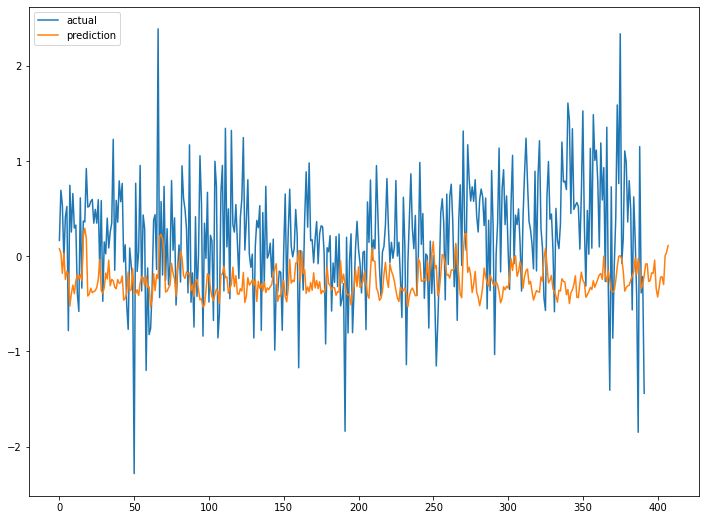

In [97]:
# 20일치의 데이터로 21일치를 예측하므로 test_data 사용시 이전 20일은 예측하지 않습니다. 
#윈조우해준 20일의 다음날인 21이 y데이터의 첫번째 날이 됨. 
# 따라서 y_test 데이터에 [20:]로 슬라이싱해주세요.
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

# 미국버전

# 베이스라인: 회귀분석

In [98]:
df_ffus = pd.read_csv('F-F_Research_Data_Factors 수정본.csv')
df_FCNTX = pd.read_csv('FCNTX monthly 수정본.csv')

In [99]:
df_ffus

,Unnamed: 0,Mkt-RF,SMB,HML,RF
0,198501,7.99,3.29,-5.41,0.65
1,198502,1.22,0.76,-0.13,0.58
2,198503,-0.84,-1.15,4.10,0.62
3,198504,-0.96,0.14,3.72,0.72
4,198505,5.09,-2.25,-0.92,0.66
...,...,...,...,...,...
433,202102,2.78,2.11,7.08,0.00
434,202103,3.08,-2.48,7.40,0.00
435,202104,4.93,-3.09,-0.74,0.00
436,202105,0.29,-0.21,7.04,0.00


In [100]:
df_FCNTX

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-01,0.971,1.073000,0.967000,1.070000,0.847810,0
1,1985-02-01,1.069,1.098000,1.068000,1.077000,0.853356,0
2,1985-03-01,1.087,1.087000,1.056000,1.086000,0.860488,0
3,1985-04-01,1.090,1.094000,1.074000,1.074000,0.850979,0
4,1985-05-01,1.067,1.103000,1.065000,1.095000,0.867619,0
...,...,...,...,...,...,...,...
433,2021-02-01,16.900,17.680000,16.450001,16.459999,16.459999,0
434,2021-03-01,16.850,16.850000,16.030001,16.799999,16.799999,0
435,2021-04-01,17.090,18.170000,17.090000,17.980000,17.980000,0
436,2021-05-01,17.910,18.020000,17.150000,18.020000,18.020000,0


In [101]:
df_FCNTX = df_FCNTX['Adj Close']
df_FCNTX = pd.DataFrame(df_FCNTX)
df_FCNTX

,Adj Close
0,0.847810
1,0.853356
2,0.860488
3,0.850979
4,0.867619
...,...
433,16.459999
434,16.799999
435,17.980000
436,18.020000


In [102]:
regress_data_us=df_ffus.merge( df_FCNTX, left_index=True, right_index=True)
regress_data_us

,Unnamed: 0,Mkt-RF,SMB,HML,RF,Adj Close
0,198501,7.99,3.29,-5.41,0.65,0.847810
1,198502,1.22,0.76,-0.13,0.58,0.853356
2,198503,-0.84,-1.15,4.10,0.62,0.860488
3,198504,-0.96,0.14,3.72,0.72,0.850979
4,198505,5.09,-2.25,-0.92,0.66,0.867619
...,...,...,...,...,...,...
433,202102,2.78,2.11,7.08,0.00,16.459999
434,202103,3.08,-2.48,7.40,0.00,16.799999
435,202104,4.93,-3.09,-0.74,0.00,17.980000
436,202105,0.29,-0.21,7.04,0.00,18.020000


In [103]:
regress_data_us['port_excess'] = regress_data_us['Adj Close'] - regress_data_us['RF']
print(regress_data_us.tail())

     Unnamed: 0  Mkt-RF   SMB   HML   RF  Adj Close  port_excess
433      202102    2.78  2.11  7.08  0.0  16.459999    16.459999
434      202103    3.08 -2.48  7.40  0.0  16.799999    16.799999
435      202104    4.93 -3.09 -0.74  0.0  17.980000    17.980000
436      202105    0.29 -0.21  7.04  0.0  18.020000    18.020000
437      202106    2.79  1.79 -7.70  0.0  18.760000    18.760000


In [104]:
regress_data_us.rename(columns={"Mkt-RF":"mkt_excess"}, inplace=True)

In [105]:
regress_data_us

,Unnamed: 0,mkt_excess,SMB,HML,RF,Adj Close,port_excess
0,198501,7.99,3.29,-5.41,0.65,0.847810,0.197810
1,198502,1.22,0.76,-0.13,0.58,0.853356,0.273356
2,198503,-0.84,-1.15,4.10,0.62,0.860488,0.240488
3,198504,-0.96,0.14,3.72,0.72,0.850979,0.130979
4,198505,5.09,-2.25,-0.92,0.66,0.867619,0.207619
...,...,...,...,...,...,...,...
433,202102,2.78,2.11,7.08,0.00,16.459999,16.459999
434,202103,3.08,-2.48,7.40,0.00,16.799999,16.799999
435,202104,4.93,-3.09,-0.74,0.00,17.980000,17.980000
436,202105,0.29,-0.21,7.04,0.00,18.020000,18.020000


In [106]:
model = smf.formula.ols(formula = "port_excess ~ mkt_excess + SMB + HML", data = regress_data_us).fit()

In [107]:
print(model.params)

Intercept     5.442907
mkt_excess    0.057554
SMB           0.020416
HML          -0.097451
dtype: float64


In [108]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            port_excess   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.716
Date:                Thu, 02 Sep 2021   Prob (F-statistic):              0.163
Time:                        17:42:53   Log-Likelihood:                -1236.7
No. Observations:                 438   AIC:                             2481.
Df Residuals:                     434   BIC:                             2498.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4429      0.199     27.360      0.0

# 본 모형 만들기: 신경망(LSTM) 구축 

In [109]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


#이상치에 민감함이 덜하다는 RobustScaler()를 사용했더니 성능은 좀 올랐다. 
scaler = RobustScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['mkt_excess', 'SMB', 'HML', 'port_excess']
# 스케일 후 columns
scaled = scaler.fit_transform(regress_data[scale_cols])
scaled

array([[ 2.05122986, -0.03583759, -0.57167558,  0.10538588],
       [ 3.66298092, -1.42357824, -0.10015257,  1.53636973],
       [-0.61622048,  0.08201242,  1.31624349, -1.22192224],
       ...,
       [-1.48145416,  0.33768369,  0.35869683, -0.38561993],
       [-1.22029984, -1.32788441,  0.46860214, -0.21367665],
       [-3.77433335, -0.55262297, -0.39458115, -1.43867247]])

In [110]:
df_us = pd.DataFrame(scaled, columns=scale_cols)
df_us

,mkt_excess,SMB,HML,port_excess
0,2.051230,-0.035838,-0.571676,0.105386
1,3.662981,-1.423578,-0.100153,1.536370
2,-0.616220,0.082012,1.316243,-1.221922
3,0.303227,0.225739,0.424645,-0.699324
4,1.619905,-0.247807,-0.875166,0.136516
...,...,...,...,...
2052,-4.421232,0.055734,0.535327,-1.848553
2053,1.310810,0.624854,-2.063026,1.150057
2054,-1.481454,0.337684,0.358697,-0.385620
2055,-1.220300,-1.327884,0.468602,-0.213677


In [111]:
x_train, x_test, y_train, y_test = train_test_split(df_us.drop('port_excess', 1), 
                                                    df_us['port_excess'], test_size=0.2, shuffle=False)

In [112]:
x_train.shape, y_train.shape

((1645, 3), (1645,))

In [113]:
x_test.shape, y_test.shape

((412, 3), (412,))

In [114]:
WINDOW_SIZE=5  #5일치 데이터 보고 다음날 종가 예측하겠다 이거임. 
BATCH_SIZE=32

In [115]:
# X값 window dataset구성

ds_x = tf.data.Dataset.from_tensor_slices(x_train)
ds_x = ds_x.window(WINDOW_SIZE, stride=1, shift=1, drop_remainder=True)
#WINDOW_SIZE+1 안함. x데이터만 단독으로 구성할 예정이므로...윈도우 사이즈만큼 쭉 구성할거임
ds_x = ds_x.flat_map(lambda x: x.batch(WINDOW_SIZE))

In [116]:
# y값 window dataset구성
ds_y = tf.data.Dataset.from_tensor_slices(y_train[WINDOW_SIZE:])
#얘좀 주의해야되는데, y값이 WINDOW_SIZE에 해당하는 인덱스 부터 구성이 되므로  y_train[WINDOW_SIZE:]이렇게 해줌

In [117]:
train_data = tf.data.Dataset.zip((ds_x, ds_y)).batch(32)

In [118]:
for x, y in train_data.take(1):
  print(x[:3])
  print()
  print(y[:3])

tf.Tensor(
[[[ 2.05122986 -0.03583759 -0.57167558]
  [ 3.66298092 -1.42357824 -0.10015257]
  [-0.61622048  0.08201242  1.31624349]
  [ 0.30322717  0.22573919  0.4246451 ]
  [ 1.61990452 -0.24780703 -0.87516608]]

 [[ 3.66298092 -1.42357824 -0.10015257]
  [-0.61622048  0.08201242  1.31624349]
  [ 0.30322717  0.22573919  0.4246451 ]
  [ 1.61990452 -0.24780703 -0.87516608]
  [ 0.40538317 -0.2486419  -0.24840127]]

 [[-0.61622048  0.08201242  1.31624349]
  [ 0.30322717  0.22573919  0.4246451 ]
  [ 1.61990452 -0.24780703 -0.87516608]
  [ 0.40538317 -0.2486419  -0.24840127]
  [-1.24059442  0.67401973 -0.48260755]]], shape=(3, 5, 3), dtype=float64)

tf.Tensor([-0.40660514 -1.28813039 -1.16271611], shape=(3,), dtype=float64)


In [119]:
pd.concat([x_train, y_train], axis=1).head(10)

,mkt_excess,SMB,HML,port_excess
0,2.051230,-0.035838,-0.571676,0.105386
1,3.662981,-1.423578,-0.100153,1.536370
2,-0.616220,0.082012,1.316243,-1.221922
3,0.303227,0.225739,0.424645,-0.699324
4,1.619905,-0.247807,-0.875166,0.136516
5,0.405383,-0.248642,-0.248401,-0.406605
6,-1.240594,0.674020,-0.482608,-1.288130
7,-0.003328,-0.285186,0.121532,-1.162716
8,-0.729771,-0.337426,-0.123305,-1.778871
9,-1.717279,0.779233,-0.139545,-1.962088


In [120]:
def windowed_dataset(x, y, WINDOW_SIZE, batch_size, shuffle): 
    ds_x = tf.data.Dataset.from_tensor_slices(x)
    ds_x = ds_x.window(WINDOW_SIZE, shift=1, stride=1, drop_remainder=True)
    ds_x = ds_x.flat_map(lambda x: x.batch(WINDOW_SIZE))
    #y값 추가
    ds_y = tf.data.Dataset.from_tensor_slices(y_train[WINDOW_SIZE:])
    ds = tf.data.Dataset.zip((ds_x, ds_y))
    if shuffle:
        ds = ds.shuffle(1000)
    return ds.batch(batch_size).prefetch(1)

In [121]:
train_data = windowed_dataset(x_train, y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(x_test, y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [122]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다. 그대로 실행해보고, 데이터의 shape을 살펴보세요.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1): #반복문 다 가져오면 더러우니까 take(1)해서 한개batch만 가져왔다함. 
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 5, 3)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32,)


In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda, Bidirectional
from tensorflow.keras.losses import Huber #손실함수임. 휴버라는데 검색해보삼. 
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    Conv1D(filters=32, kernel_size=5,padding="causal",activation="relu",input_shape=[WINDOW_SIZE, 3]),
           #컬럼을 여러개 넣을때는 input_shape 넣을때 주의해야함. feature갯수만큼 넣어야됨
    Bidirectional(LSTM(256,input_shape=[WINDOW_SIZE, 3],return_sequences=True, activation='LeakyReLU')),
    tf.keras.layers.BatchNormalization(),
    Bidirectional(LSTM(128,return_sequences=True, activation='LeakyReLU')),
    tf.keras.layers.BatchNormalization(),
    Bidirectional(LSTM(64,activation='LeakyReLU')),
    tf.keras.layers.BatchNormalization(),
    Dense(512,'LeakyReLU'),
    Dense(256,'LeakyReLU'),
    Dense(128,'LeakyReLU'),
    Dense(1)])



In [124]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Nadam()
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [125]:
#콜벡 들을 정의해 보자. 
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
#모델 전체를 저장할거면 확장자를 에이치파이브로 저장하는데, 가중치만 저장하므로 ckpt로 확장자를 가져간다는데?
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [126]:
# callbacks로 앞에서 구현한 earlystopping과 checkpoint를 지정해주세요.
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
52/52 [==============================] - 17s 128ms/step - loss: 0.3029 - mse: 0.6927 - val_loss: 0.4532 - val_mse: 1.0492

Epoch 00001: val_loss improved from inf to 0.45316, saving model to tmp/ckeckpointer.ckpt
Epoch 2/50
52/52 [==============================] - 6s 110ms/step - loss: 0.2598 - mse: 0.5697 - val_loss: 0.4864 - val_mse: 1.1334

Epoch 00002: val_loss did not improve from 0.45316
Epoch 3/50
52/52 [==============================] - 6s 110ms/step - loss: 0.2477 - mse: 0.5397 - val_loss: 0.4742 - val_mse: 1.1024

Epoch 00003: val_loss did not improve from 0.45316
Epoch 4/50
52/52 [==============================] - 6s 111ms/step - loss: 0.2353 - mse: 0.5086 - val_loss: 0.4558 - val_mse: 1.0561

Epoch 00004: val_loss did not improve from 0.45316
Epoch 5/50
52/52 [==============================] - 6s 111ms/step - loss: 0.2289 - mse: 0.4915 - val_loss: 0.5601 - val_mse: 1.3248

Epoch 00005: val_loss did not improve from 0.45316
Epoch 6/50
52/52 [======================

In [127]:
model.load_weights(filename)

In [128]:
pred_us = model.predict(test_data) 
#predict안에 넣어줄떄도 윈도우드된 데이터 셋을 넣어줘야함. 

In [129]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 5, 32)             512       
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 5, 512)            591872    
_________________________________________________________________
batch_normalization_12 (Batc (None, 5, 512)            2048      
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 5, 256)            656384    
_________________________________________________________________
batch_normalization_13 (Batc (None, 5, 256)            1024      
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 128)               164352    
_________________________________________________________________
batch_normalization_14 (Batc (None, 128)              

In [130]:
pred_us.shape

(408, 1)

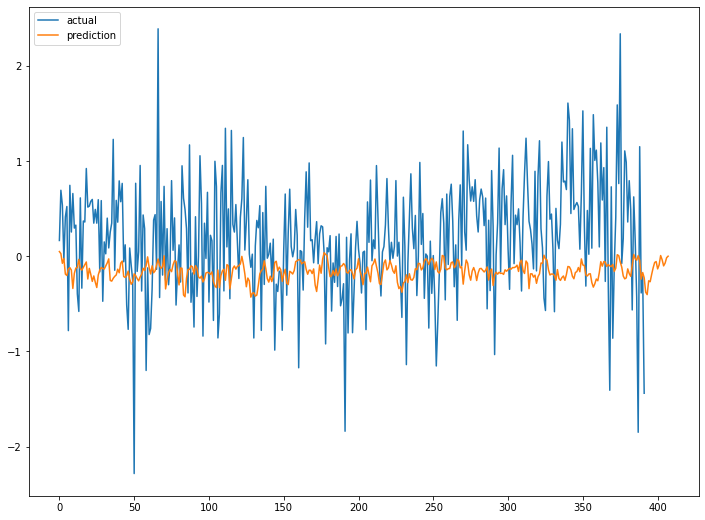

In [131]:
# 20일치의 데이터로 21일치를 예측하므로 test_data 사용시 이전 20일은 예측하지 않습니다. 
#윈조우해준 20일의 다음날인 21이 y데이터의 첫번째 날이 됨. 
# 따라서 y_test 데이터에 [20:]로 슬라이싱해주세요.
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred_us, label='prediction')
plt.legend()
plt.show()

In [132]:
y_test.shape

(412,)

In [133]:
pred_us.shape

(408, 1)

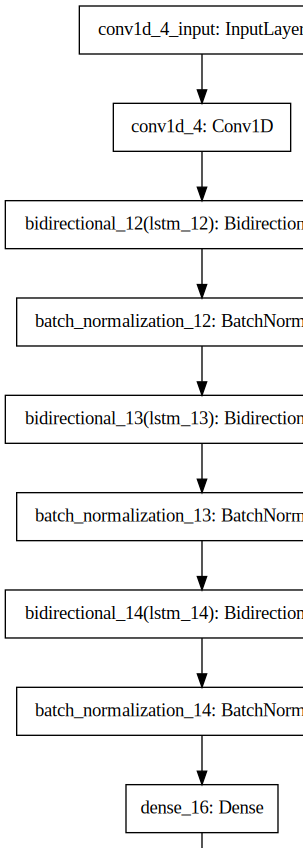

In [134]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))